In [118]:
import spacy
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
import matplotlib.pyplot as plt

In [18]:
# load the different Spacy models
nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load("en_core_web_lg")
nlp_trf = spacy.load("en_core_web_trf")


In [40]:
# Remove pipelines that are not needed to vectorized srting. 
print("\n ------- NLP Small --------- \n")
print(nlp_sm.pipe_names)
nlp_sm.disable_pipe('tagger')
nlp_sm.disable_pipe('parser')
nlp_sm.disable_pipe('ner')
nlp_sm.disable_pipe('lemmatizer')
print(nlp_sm.pipe_names)

print("\n ------- NLP Large --------- \n")
print(nlp_lg.pipe_names)
nlp_lg.disable_pipe('tagger')
nlp_lg.disable_pipe('parser')
nlp_lg.disable_pipe('ner')
nlp_lg.disable_pipe('lemmatizer')
print(nlp_lg.pipe_names)

print("\n ------- NLP Transformer --------- \n")
print(nlp_trf.pipe_names)
nlp_trf.disable_pipe('tagger')
nlp_trf.disable_pipe('parser')
nlp_trf.disable_pipe('ner')
nlp_trf.disable_pipe('lemmatizer')
print(nlp_trf.pipe_names)



 ------- NLP Small --------- 

['tok2vec', 'attribute_ruler', 'lemmatizer']
['tok2vec', 'attribute_ruler']

 ------- NLP Large --------- 

['tok2vec', 'attribute_ruler', 'lemmatizer']
['tok2vec', 'attribute_ruler']

 ------- NLP Transformer --------- 

['transformer', 'attribute_ruler', 'lemmatizer']
['transformer', 'attribute_ruler']


In [8]:
# Read the phrases CSV into a dataframe
df = pd.read_csv("../data/verb_noun_phrases.csv", index_col=0)


,Phrases
0,achieve broad adoption
1,Delivers monthly forecasting reports
2,Manages overall product health
3,leads cross-functional teams
4,leading cross-functional product teams


In [68]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181],
           dtype='int64', length=2182)

In [21]:
phrases = [s for s in df["Phrases"] ]

In [52]:
vectorized_phrases = np.stack([nlp_lg(p).vector for p in phrases])

In [125]:
k_means = KMeans(n_clusters=14, random_state=1)
k_means.fit(vectorized_phrases)

KMeans(n_clusters=14, random_state=1)

In [126]:
prediction = k_means.predict(vectorized_phrases)


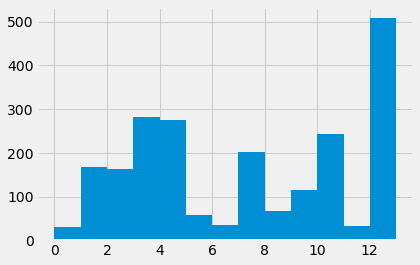

In [127]:
plt.hist(prediction, bins=range(14))
plt.show()

In [119]:
kmeans_kwargs = {
    "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 1
}

sse = []
for k in range(4,16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vectorized_phrases)
    sse.append(kmeans.inertia_)

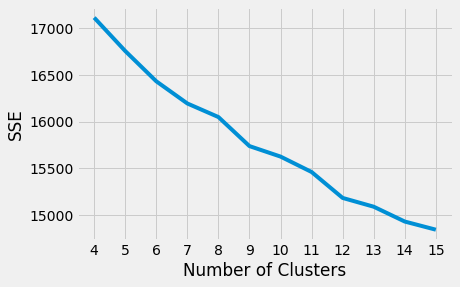

In [120]:
plt.style.use("fivethirtyeight")
plt.plot(range(4, 16), sse)
plt.xticks(range(4, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [123]:
silhouette_coefficients = []

for k in range(4,16):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vectorized_phrases)
    score = silhouette_score(vectorized_phrases, kmeans.labels_)
    silhouette_coefficients.append(score)

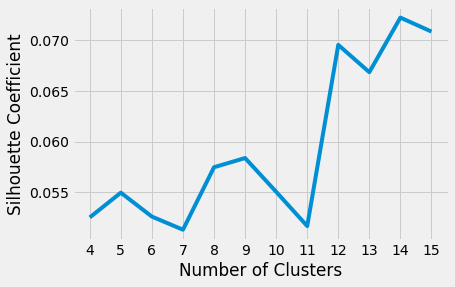

In [124]:
plt.style.use("fivethirtyeight")
plt.plot(range(4, 16), silhouette_coefficients)
plt.xticks(range(4, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [128]:
df1 = pd.read_csv("../data/verb_noun_phrases.csv")
df1.rename( columns={'Unnamed: 0':'Index'}, inplace=True )
df1.head()
df1["Group"] = df1["Index"].apply(lambda g: prediction[g])


In [133]:
df1

,Index,Phrases,Group
0,0,achieve broad adoption,7
1,1,Delivers monthly forecasting reports,2
2,2,Manages overall product health,7
3,3,leads cross-functional teams,3
4,4,leading cross-functional product teams,12
...,...,...,...
2177,2177,experience using programming,12
2178,2178,experience accessing data,9
2179,2179,scale distributed computing environments,4
2180,2180,partnerships provide technology,4


In [135]:
df1 = df1.drop_duplicates(subset=["Phrases"])

In [129]:
dfg = df1.groupby(["Group"])


In [97]:
dfg.get_group(6).head(100)

,Index,Phrases,Group
36,36,utilizing available studies,6
66,66,data driven decisions,6
90,90,based on input,6
101,101,monitoring key component lifecycles,6
113,113,create novel algorithms,6
...,...,...,...
1503,1503,based on data,6
1504,1504,data driven recommendations,6
1505,1505,data driven decision making,6
1506,1506,data driven insights,6


In [104]:
type(dfg)

pandas.core.groupby.generic.DataFrameGroupBy

In [130]:
for name, df in dfg:
    print(df)

      Index                      Phrases  Group
14       14  vaccinated against COVID-19      0
74       74  vaccinated against COVID-19      0
149     149        deliver against goals      0
173     173     synthesize against goals      0
199     199     synthesize against goals      0
232     232     synthesize against goals      0
252     252     synthesize against goals      0
278     278     synthesize against goals      0
304     304     synthesize against goals      0
330     330     synthesize against goals      0
398     398  vaccinated against COVID-19      0
458     458  vaccinated against COVID-19      0
533     533        deliver against goals      0
557     557     synthesize against goals      0
583     583     synthesize against goals      0
616     616     synthesize against goals      0
636     636     synthesize against goals      0
662     662     synthesize against goals      0
688     688     synthesize against goals      0
714     714     synthesize against goals

In [138]:
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [145]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, gen_min_span_tree=True)
clusterer.fit(vectorized_phrases)

/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/hdbscan/hdbscan_.py:217: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  warn('Cannot generate Minimum Spanning Tree; '


HDBSCAN(gen_min_span_tree=True, min_cluster_size=4)

In [142]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

AttributeError: No minimum spanning tree was generated.This may be due to optimized algorithm variations that skip explicit generation of the spanning tree.

<AxesSubplot:ylabel='distance'>

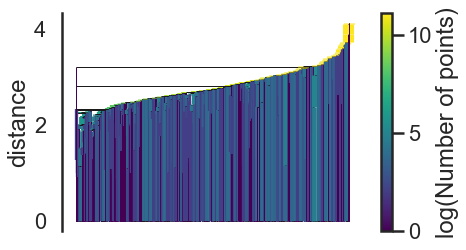

In [146]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [147]:
clusterer.cluster_persistence_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

<AxesSubplot:ylabel='$\\lambda$ value'>

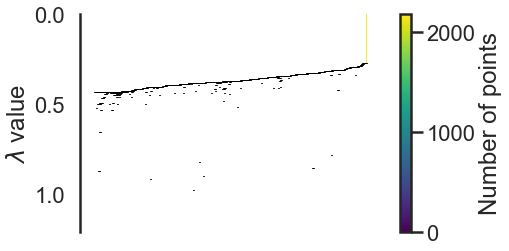

In [148]:
clusterer.condensed_tree_.plot()

In [151]:
len(clusterer.labels_)

2182

In [152]:
from sklearn.manifold import TSNE

In [153]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(vectorized_phrases)

/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/eliranboraks/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [157]:
new_values[0][1]

570.339

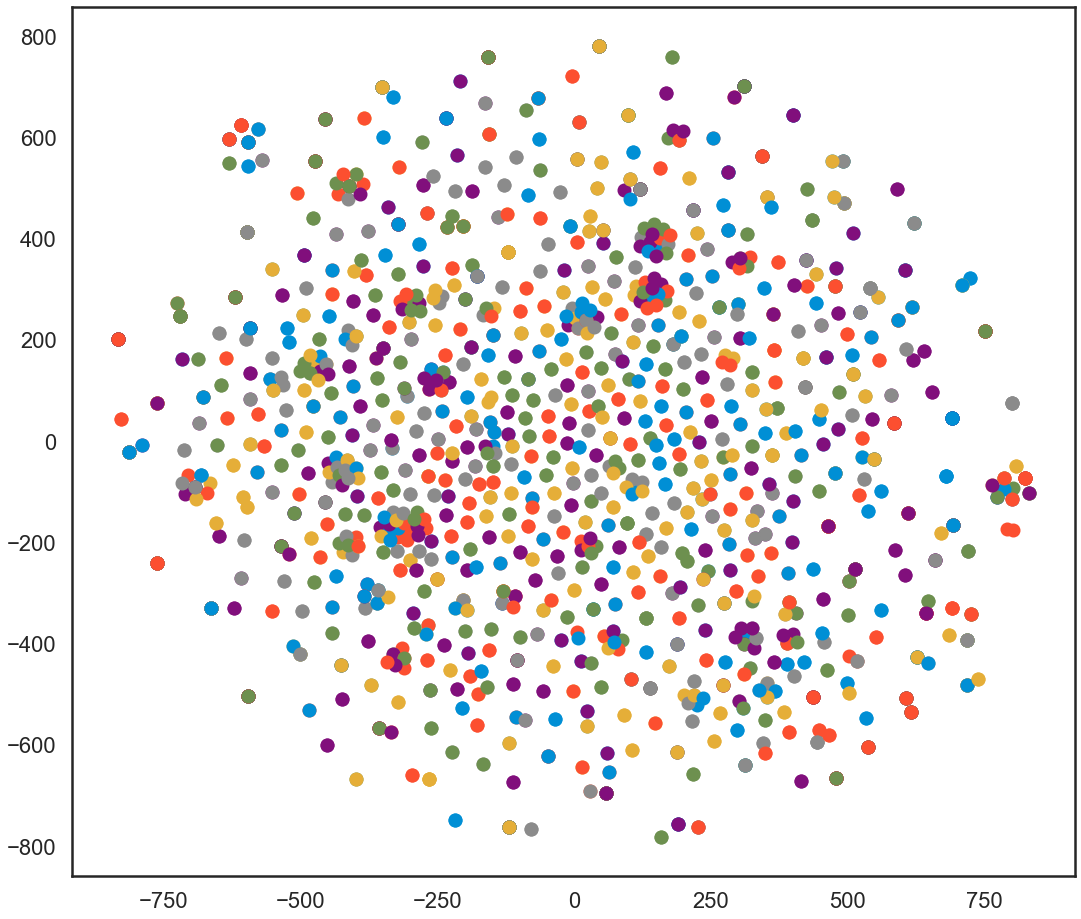

In [159]:
plt.figure(figsize=(16, 16)) 
for v in new_values:
    plt.scatter(v[0],v[1])

plt.show()